<a href="https://colab.research.google.com/github/THODESAIPRAJWAL/stockmarket-prediction/blob/main/Long_Short_Term_Memory_on_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [3]:
MSFT = yf.Ticker("MSFT")


In [4]:
MSFT.history(period='5d')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-03 00:00:00-04:00,286.519989,288.269989,283.950012,287.230011,24883300,0.0,0.0
2023-04-04 00:00:00-04:00,287.230011,290.450012,285.670013,287.179993,25824300,0.0,0.0
2023-04-05 00:00:00-04:00,285.850006,287.149994,282.920013,284.339996,22064800,0.0,0.0
2023-04-06 00:00:00-04:00,283.209991,292.079987,282.029999,291.600006,29770300,0.0,0.0
2023-04-10 00:00:00-04:00,289.209991,289.600006,284.709991,289.390015,23079400,0.0,0.0


In [5]:
df=MSFT.history(start='2001-01-19', end='2023-04-11', actions=False)

In [6]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-19 00:00:00-05:00,18.716955,19.165382,18.366012,19.028904,209348800
2001-01-22 00:00:00-05:00,18.950904,19.028891,18.404993,18.755936,76673000
2001-01-23 00:00:00-05:00,18.638961,19.009401,18.385502,18.892420,70295200
2001-01-24 00:00:00-05:00,19.028896,19.789272,18.950908,19.633297,110455000
2001-01-25 00:00:00-05:00,19.574807,19.964743,19.204367,19.282354,85657400
...,...,...,...,...,...
2023-04-03 00:00:00-04:00,286.519989,288.269989,283.950012,287.230011,24883300
2023-04-04 00:00:00-04:00,287.230011,290.450012,285.670013,287.179993,25824300
2023-04-05 00:00:00-04:00,285.850006,287.149994,282.920013,284.339996,22064800


In [7]:
df.index

DatetimeIndex(['2001-01-19 00:00:00-05:00', '2001-01-22 00:00:00-05:00',
               '2001-01-23 00:00:00-05:00', '2001-01-24 00:00:00-05:00',
               '2001-01-25 00:00:00-05:00', '2001-01-26 00:00:00-05:00',
               '2001-01-29 00:00:00-05:00', '2001-01-30 00:00:00-05:00',
               '2001-01-31 00:00:00-05:00', '2001-02-01 00:00:00-05:00',
               ...
               '2023-03-27 00:00:00-04:00', '2023-03-28 00:00:00-04:00',
               '2023-03-29 00:00:00-04:00', '2023-03-30 00:00:00-04:00',
               '2023-03-31 00:00:00-04:00', '2023-04-03 00:00:00-04:00',
               '2023-04-04 00:00:00-04:00', '2023-04-05 00:00:00-04:00',
               '2023-04-06 00:00:00-04:00', '2023-04-10 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=5590, freq=None)

In [8]:
df.shape

(5590, 5)

In [9]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
df=df.drop(['Open','High','Volume','Low'],axis=1)

In [11]:
df.head()

,Close
Date,
2001-01-19 00:00:00-05:00,19.028904
2001-01-22 00:00:00-05:00,18.755936
2001-01-23 00:00:00-05:00,18.892420
2001-01-24 00:00:00-05:00,19.633297
2001-01-25 00:00:00-05:00,19.282354


In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

Text(0.5, 0, 'Time')

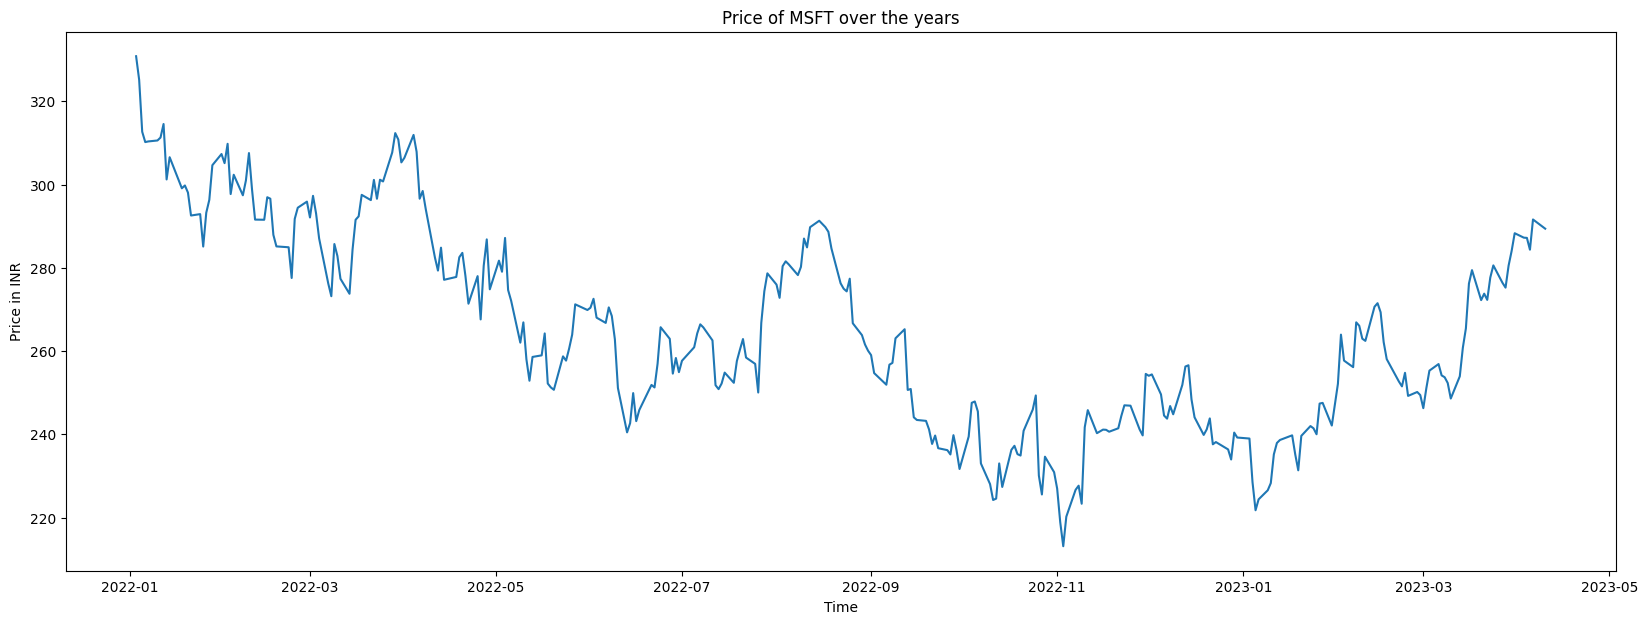

In [13]:
plt.figure(figsize=(20,7))
plt.title("Price of MSFT over the years")
plt.plot(df['2022-01-1':'2023-04-11'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

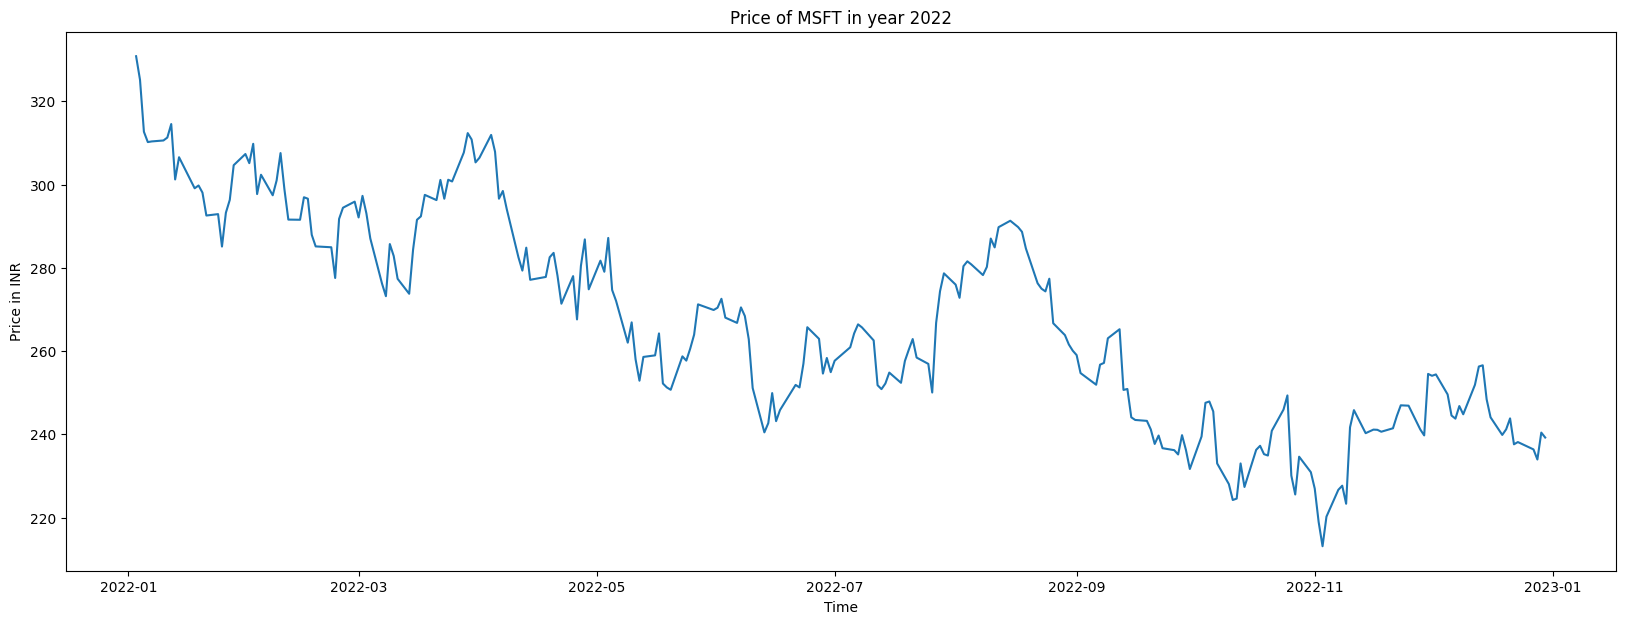

In [14]:
plt.figure(figsize=(20,7))
plt.title("Price of MSFT in year 2022")
plt.plot(df['2022-01-01':'2023-01-01'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

In [15]:
data=df.values

In [16]:
data

array([[ 19.02890396],
       [ 18.75593567],
       [ 18.89241982],
       ...,
       [284.33999634],
       [291.6000061 ],
       [289.39001465]])

In [17]:
len(data)

5590

In [18]:
import math

In [19]:
train_len=math.ceil(len(data)*0.92)

In [20]:
train_len

5143

In [21]:
min_max_scalar=MinMaxScaler(feature_range=(0,1))

In [22]:
scaled_data=min_max_scalar.fit_transform(data)

In [23]:
len(scaled_data)

5590

In [24]:
scaled_data

array([[0.02335235],
       [0.02251936],
       [0.02293586],
       ...,
       [0.83297018],
       [0.85512467],
       [0.84838071]])

In [25]:
train_data=scaled_data[0:train_len,:]

In [26]:
len(train_data)

5143

In [27]:
len(train_data)

5143

In [28]:
interval=60

In [29]:
x_train=[]
y_train=[]

for i in range(interval,len(train_data)):
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])

In [30]:
x_train

[array([0.02335235, 0.02251936, 0.02293586, 0.0251967 , 0.02412577,
        0.02620815, 0.0266841 , 0.02561317, 0.02341182, 0.02466123,
        0.02317383, 0.02424475, 0.02483976, 0.02686261, 0.02454223,
        0.02156744, 0.02121045, 0.02067499, 0.02085349, 0.02126995,
        0.01984207, 0.01847366, 0.01883062, 0.01781919, 0.01930659,
        0.02198392, 0.02180543, 0.02144845, 0.02179055, 0.01924709,
        0.01996105, 0.02186494, 0.02305484, 0.02168642, 0.01924709,
        0.01472539, 0.01686725, 0.01668876, 0.01639128, 0.01722422,
        0.01698625, 0.01543934, 0.0129405 , 0.01668876, 0.01912809,
        0.01865214, 0.02073449, 0.01817617, 0.01799769, 0.01734321,
        0.01841414, 0.01609381, 0.01472539, 0.01930659, 0.01877114,
        0.01968738, 0.02209577, 0.02243848, 0.02447563, 0.02315243]),
 array([0.02251936, 0.02293586, 0.0251967 , 0.02412577, 0.02620815,
        0.0266841 , 0.02561317, 0.02341182, 0.02466123, 0.02317383,
        0.02424475, 0.02483976, 0.02686261, 0.

In [31]:
y_train

[0.023809256832147192,
 0.02756940888750519,
 0.030053973941087574,
 0.030967821495068444,
 0.03025387645652621,
 0.029587513396837108,
 0.03162467397941247,
 0.031091575383065416,
 0.02917819197018922,
 0.02977791115735621,
 0.03208160066661566,
 0.03169131785193458,
 0.030520393742359216,
 0.03263370877280177,
 0.03323345124167095,
 0.0338807582281166,
 0.032300530153170005,
 0.031919746272982906,
 0.03134858209355335,
 0.030701280927533235,
 0.030272909248067463,
 0.031120147852079484,
 0.030177704547382368,
 0.030101567560791805,
 0.030767942261331997,
 0.03221488259123436,
 0.03163417873433199,
 0.0335570901838299,
 0.03278601766853618,
 0.032243414317269604,
 0.03114869703939136,
 0.031139180643620736,
 0.032243414317269604,
 0.03266228124181584,
 0.03439480075122021,
 0.034166325766767515,
 0.03542286833615078,
 0.03495644271445359,
 0.03393785078231481,
 0.03389980266050895,
 0.03257659293690137,
 0.03087264007608554,
 0.030034935329120778,
 0.028949728626587616,
 0.02936856644

In [32]:
import numpy as np

In [33]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [34]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [35]:
x_train.shape

(5083, 60, 1)

In [36]:
import tensorflow as tf
import keras#This line imports the keras library, which is a high-level neural networks API that is built on top of TensorFlow. Keras is used for building and training deep learning models, including Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs).
from keras.preprocessing import image#This line imports the image module from the keras.preprocessing package. This module provides tools for loading, preprocessing, and augmenting images for use in deep learning models.
from keras.models import Sequential#This line imports the Sequential model from the keras.models package. Sequential is a linear stack of layers in a deep learning model, where each layer receives the output of the previous layer.
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM#This line imports several layer classes from the keras.layers package. These include Conv2D and MaxPool2D layers for building Convolutional Neural Networks (CNNs), Flatten and Dense layers for building fully connected networks, Dropout and BatchNormalization layers for regularization, and LSTM layers for building Recurrent Neural Networks (RNNs).
from keras import regularizers #This line imports the regularizers module from the keras library. This module provides functions for adding L1 and L2 regularization to the weights of a neural network, which helps prevent overfitting.
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax #This line imports several optimizer classes from the tensorflow.keras.optimizers package. Optimizers are used to train deep learning models by updating the weights of the network during backpropagation. The optimizers imported here are Adam, RMSprop, SGD, and Adamax, which are commonly used optimizers for deep learning models.

In [37]:
model=Sequential()
#This line creates a new sequential model object.
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
#This line adds an LSTM layer to the model with 50 units and returns the full sequence of outputs. The input_shape parameter specifies the shape of the input data. x_train.shape[1] represents the number of time steps in the input sequence and 1 represents the number of features in each time step.
model.add(LSTM(units=50))
#This line adds a second LSTM layer to the model with 50 units. Since return_sequences is not specified, this layer returns only the last output in the sequence.
model.add(Dense(50))
#This line adds a fully connected layer to the model with 50 units.
model.add(Dense(1))
#This line adds a final fully connected layer to the model with a single unit. This layer will output a single prediction value for the input sequence.

In [38]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [39]:
##Early stopping Keras
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [40]:
history=model.fit(x_train,y_train,batch_size=64,epochs=100,callbacks=early_stopping)

Epoch 1/100
80/80 [==============================] - 19s 169ms/step - loss: 0.0020
Epoch 2/100
80/80 [==============================] - 12s 155ms/step - loss: 6.2723e-05
Epoch 3/100
80/80 [==============================] - 7s 90ms/step - loss: 6.0139e-05
Epoch 4/100
80/80 [==============================] - 6s 75ms/step - loss: 6.0947e-05
Epoch 5/100
80/80 [==============================] - 7s 91ms/step - loss: 6.8232e-05
Epoch 6/100
80/80 [==============================] - 6s 75ms/step - loss: 6.6514e-05
Epoch 7/100
80/80 [==============================] - 7s 91ms/step - loss: 5.9750e-05
Epoch 8/100
80/80 [==============================] - 6s 74ms/step - loss: 6.6352e-05
Epoch 9/100
80/80 [==============================] - 7s 90ms/step - loss: 6.0820e-05
Epoch 10/100
80/80 [==============================] - 6s 75ms/step - loss: 5.9577e-05
Epoch 11/100
80/80 [==============================] - 7s 90ms/step - loss: 6.0579e-05
Epoch 12/100
80/80 [==============================] - 6s 75ms/s

In [41]:
test_data=scaled_data[train_len-interval:,:]

In [42]:
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])

In [43]:
y_test

array([[266.71514893],
       [267.40429688],
       [273.36087036],
       [273.37069702],
       [275.60565186],
       [273.13446045],
       [273.64639282],
       [273.03598022],
       [276.63943481],
       [278.14581299],
       [276.68865967],
       [276.4130249 ],
       [272.73080444],
       [275.00512695],
       [277.05288696],
       [281.71969604],
       [285.19522095],
       [284.5847168 ],
       [282.11358643],
       [281.7984314 ],
       [282.07418823],
       [280.50872803],
       [280.4201355 ],
       [282.68460083],
       [282.08401489],
       [285.04748535],
       [284.98846436],
       [283.87582397],
       [282.0151062 ],
       [282.51721191],
       [285.33303833],
       [288.32608032],
       [290.04901123],
       [288.55252075],
       [286.7868042 ],
       [292.74484253],
       [300.23187256],
       [300.51800537],
       [298.51550293],
       [297.91381836],
       [295.03338623],
       [295.65487671],
       [299.47235107],
       [297

In [44]:
x_test

[array([0.70824875, 0.71436364, 0.72440536, 0.73219887, 0.73237879,
        0.74011237, 0.73141949, 0.74313987, 0.74685675, 0.74086166,
        0.7394229 , 0.74637705, 0.73615564, 0.74808565, 0.74928456,
        0.75054364, 0.72833201, 0.72218713, 0.72119798, 0.72023887,
        0.70803879, 0.70408216, 0.71385405, 0.72203734, 0.70621034,
        0.70336276, 0.68169071, 0.69377065, 0.70911785, 0.7002154 ,
        0.69392058, 0.69572324, 0.70581814, 0.70188232, 0.71873725,
        0.72156141, 0.72087046, 0.71432076, 0.71543236, 0.70858224,
        0.70828185, 0.70350478, 0.71876728, 0.72784072, 0.72411514,
        0.72717971, 0.73814595, 0.74009891, 0.74610773, 0.74151094,
        0.73856655, 0.74914208, 0.74472563, 0.75433986, 0.76299264,
        0.76227156, 0.76653798, 0.7615205 , 0.77263686, 0.78068879]),
 array([0.71436364, 0.72440536, 0.73219887, 0.73237879, 0.74011237,
        0.73141949, 0.74313987, 0.74685675, 0.74086166, 0.7394229 ,
        0.74637705, 0.73615564, 0.74808565, 0.

In [45]:
len(y_test)

447

In [46]:
len(x_test)

447

In [47]:
x_test=np.array(x_test)

In [48]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [49]:
predictions=model.predict(x_test)
predictions=min_max_scalar.inverse_transform(predictions)

14/14 [==============================] - 1s 20ms/step


In [50]:
predictions[0:5]

array([[264.45355],
       [265.64932],
       [266.7439 ],
       [268.4133 ],
       [270.129  ]], dtype=float32)

In [51]:
rmse_error=np.sqrt(np.mean(predictions-y_test)**2)
rmse_error

1.7247334934721057

In [52]:
train_data=df[0:train_len]
valid_data=df[train_len:]
valid_data['predictions']=predictions

<ipython-input-52-373018d9c8b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


In [53]:
train_data.head()

,Close
Date,
2001-01-19 00:00:00-05:00,19.028904
2001-01-22 00:00:00-05:00,18.755936
2001-01-23 00:00:00-05:00,18.892420
2001-01-24 00:00:00-05:00,19.633297
2001-01-25 00:00:00-05:00,19.282354


In [54]:
valid_data.head()

,Close,predictions
Date,,
2021-06-30 00:00:00-04:00,266.715149,264.453552
2021-07-01 00:00:00-04:00,267.404297,265.649323
2021-07-02 00:00:00-04:00,273.360870,266.743896
2021-07-06 00:00:00-04:00,273.370697,268.413300
2021-07-07 00:00:00-04:00,275.605652,270.128998


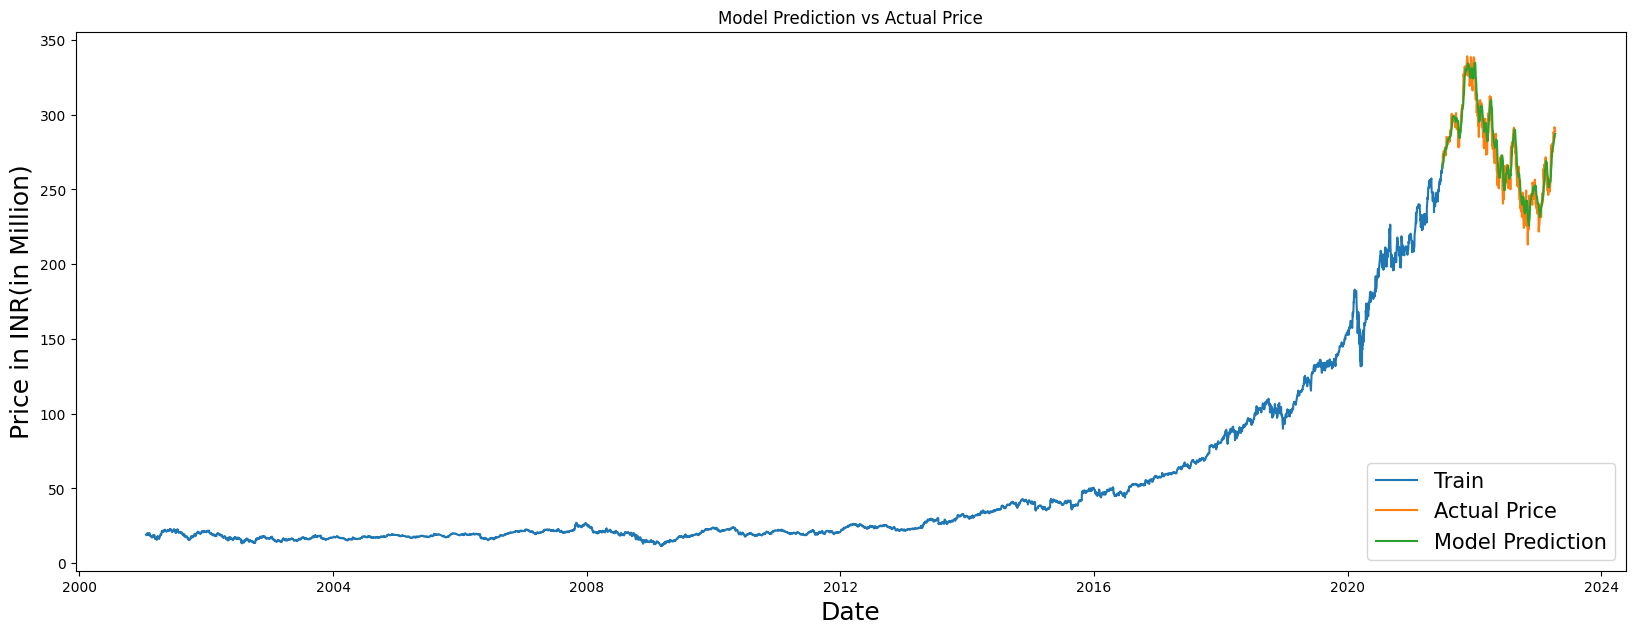

In [55]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

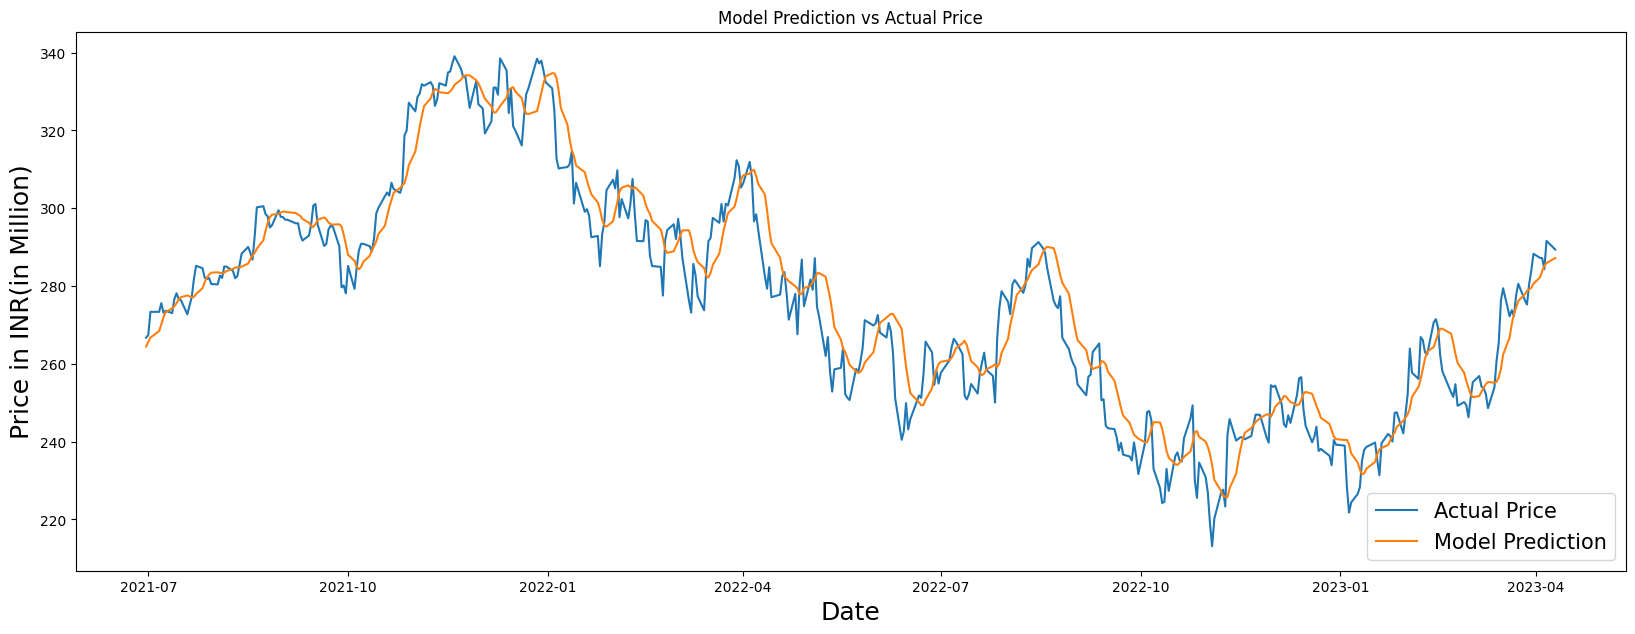

In [56]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [57]:
valid_data.head(30)

,Close,predictions
Date,,
2021-06-30 00:00:00-04:00,266.715149,264.453552
2021-07-01 00:00:00-04:00,267.404297,265.649323
2021-07-02 00:00:00-04:00,273.360870,266.743896
2021-07-06 00:00:00-04:00,273.370697,268.413300
2021-07-07 00:00:00-04:00,275.605652,270.128998
2021-07-08 00:00:00-04:00,273.134460,271.956970
2021-07-09 00:00:00-04:00,273.646393,273.277466
2021-07-12 00:00:00-04:00,273.035980,274.252594
2021-07-13 00:00:00-04:00,276.639435,274.825409


In [59]:
df_test=MSFT.history(start='2001-01-19', end='2023-02-21', actions=False)

In [60]:
df_test.head(1)

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-19 00:00:00-05:00,18.716945,19.165372,18.366003,19.028894,209348800


In [61]:
df_test.tail(1)

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-17 00:00:00-05:00,259.390015,260.089996,256.0,258.059998,30000100


In [62]:
df_test=df_test.drop(['Open','High','Volume','Low'],axis=1)

In [63]:
test_value=df_test[-60:].values

In [64]:
test_value

array([[244.4178009 ],
       [246.96144104],
       [246.87165833],
       [241.15597534],
       [239.72955322],
       [254.50254822],
       [254.05366516],
       [254.38284302],
       [249.57489014],
       [244.50756836],
       [243.75944519],
       [246.78187561],
       [244.80682373],
       [251.87910461],
       [256.27810669],
       [256.57736206],
       [248.38786316],
       [244.07865906],
       [239.84924316],
       [241.19587708],
       [243.81929016],
       [237.59489441],
       [238.13354492],
       [236.36798096],
       [233.94403076],
       [240.40783691],
       [239.2208252 ],
       [238.98143005],
       [228.52761841],
       [221.75456238],
       [224.36801147],
       [226.55255127],
       [228.27822876],
       [235.18093872],
       [237.91409302],
       [238.6322937 ],
       [239.74951172],
       [235.22084045],
       [231.3505249 ],
       [239.61982727],
       [241.97392273],
       [241.43527222],
       [240.0088501 ],
       [247

In [65]:
test_value=min_max_scalar.transform(test_value)

In [66]:
test=[]
test.append(test_value)

In [67]:
test

[array([[0.71114443],
        [0.71890655],
        [0.71863257],
        [0.70119071],
        [0.69683787],
        [0.74191884],
        [0.74054904],
        [0.74155355],
        [0.7268817 ],
        [0.71141837],
        [0.70913541],
        [0.71835859],
        [0.71233157],
        [0.73391319],
        [0.7473371 ],
        [0.7482503 ],
        [0.72325939],
        [0.71010951],
        [0.69720312],
        [0.70131248],
        [0.70931803],
        [0.69032379],
        [0.69196753],
        [0.68657977],
        [0.67918289],
        [0.69890771],
        [0.69528545],
        [0.69455492],
        [0.66265428],
        [0.64198576],
        [0.64996091],
        [0.65662721],
        [0.66189325],
        [0.68295742],
        [0.69129785],
        [0.6934895 ],
        [0.69689878],
        [0.68307918],
        [0.6712686 ],
        [0.69650304],
        [0.70368675],
        [0.70204301],
        [0.69769017],
        [0.720185  ],
        [0.72067205],
        [0

In [68]:
test=np.array(test)

In [69]:
test

array([[[0.71114443],
        [0.71890655],
        [0.71863257],
        [0.70119071],
        [0.69683787],
        [0.74191884],
        [0.74054904],
        [0.74155355],
        [0.7268817 ],
        [0.71141837],
        [0.70913541],
        [0.71835859],
        [0.71233157],
        [0.73391319],
        [0.7473371 ],
        [0.7482503 ],
        [0.72325939],
        [0.71010951],
        [0.69720312],
        [0.70131248],
        [0.70931803],
        [0.69032379],
        [0.69196753],
        [0.68657977],
        [0.67918289],
        [0.69890771],
        [0.69528545],
        [0.69455492],
        [0.66265428],
        [0.64198576],
        [0.64996091],
        [0.65662721],
        [0.66189325],
        [0.68295742],
        [0.69129785],
        [0.6934895 ],
        [0.69689878],
        [0.68307918],
        [0.6712686 ],
        [0.69650304],
        [0.70368675],
        [0.70204301],
        [0.69769017],
        [0.720185  ],
        [0.72067205],
        [0

In [70]:
test=np.reshape(test,(test.shape[0],test.shape[1],1))

In [71]:
tomorrow_prediction=model.predict(test)

1/1 [==============================] - 0s 46ms/step


In [72]:
tomorrow_prediction=min_max_scalar.inverse_transform(tomorrow_prediction)

In [73]:
tomorrow_prediction

array([[267.78775]], dtype=float32)

In [74]:
model.save("msft_price_prediction.h5")
